# Model Trainer Script
- A script used for training and testing the deep learning model

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as DataLoader
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import numpy as np
from src.model_utils.model import ChessEngine
import src.utils.board_to_tensor as bt
from src.utils.data_preperation import chessDataLoader
from src.model_utils.trainer import trainer

## DataLoader Logic

In [2]:
tensor_file = "dataset/board_2_tensor.pt"
value_file = "dataset/value_2.pt"
policy_file = "dataset/policy_2.pt"
batch_size = 256
num_epochs = 20
dataloader = chessDataLoader(tensor_file, value_file, policy_file, batch_size=batch_size)

Epoch 1/10: 100%|█████████████| 12693/12693 [10:07<00:00, 20.88it/s, loss=0.483]


Epoch 1: Loss = 0.5009


Epoch 2/10: 100%|█████████████| 12693/12693 [12:23<00:00, 17.07it/s, loss=0.472]


Epoch 2: Loss = 0.4763


Epoch 3/10: 100%|█████████████| 12693/12693 [19:42<00:00, 10.73it/s, loss=0.467]


Epoch 3: Loss = 0.4655


Epoch 4/10: 100%|█████████████| 12693/12693 [52:34<00:00,  4.02it/s, loss=0.465]


Epoch 4: Loss = 0.4594


Epoch 5/10: 100%|█████████████| 12693/12693 [09:58<00:00, 21.20it/s, loss=0.462]


Epoch 5: Loss = 0.4552


Epoch 6/10: 100%|██████████████| 12693/12693 [20:55<00:00, 10.11it/s, loss=0.46]


Epoch 6: Loss = 0.4519


Epoch 7/10: 100%|█████████████| 12693/12693 [09:59<00:00, 21.18it/s, loss=0.457]


Epoch 7: Loss = 0.4493


Epoch 8/10: 100%|█████████████| 12693/12693 [13:44<00:00, 15.40it/s, loss=0.456]


Epoch 8: Loss = 0.4473


Epoch 9/10: 100%|█████████████| 12693/12693 [09:58<00:00, 21.20it/s, loss=0.454]


Epoch 9: Loss = 0.4455


Epoch 10/10: 100%|████████████| 12693/12693 [09:59<00:00, 21.18it/s, loss=0.453]

Epoch 10: Loss = 0.4440


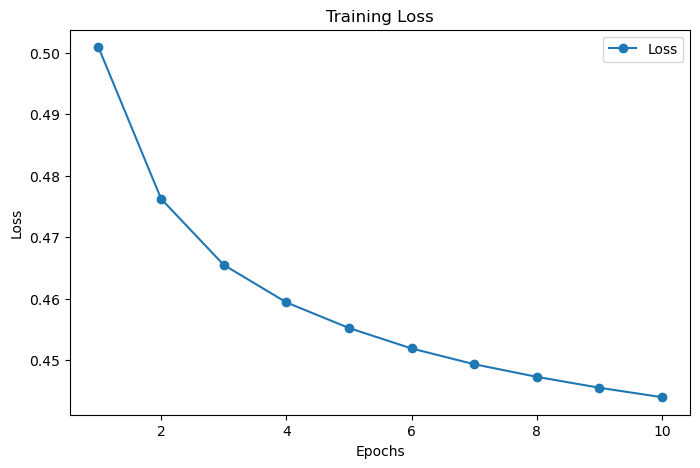

In [3]:
# Main execution
if __name__ == "__main__":
    batch_size = 256
    num_epochs = 10
    learning_rate = 0.001
    device = "mps"


    # Initialize model, loss, and optimizer
    model = ChessEngine().to(device)
    value_loss_fn = nn.MSELoss()
    policy_loss_fn = nn.CosineEmbeddingLoss()
    lamda = 0.5 # Tuning required
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Train model
    trainer(model, dataloader, value_loss_fn, policy_loss_fn, optimizer, lamda=0.45, num_epochs=num_epochs)

In [ ]:
# Main execution
if __name__ == "__main__":
    batch_size = 256
    num_epochs = 20
    learning_rate = 0.001
    device = "mps"


    # Initialize model, loss, and optimizer
    model = ChessEngine()
    # Load latest
    model.load_state_dict(torch.load("./trainer/first/model_epoch_10.pth", map_location=torch.device("cpu")))
    model.to(device)
    value_loss_fn = nn.MSELoss()
    policy_loss_fn = nn.CosineEmbeddingLoss()
    lamda = 0.5 # Tuning required
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Train model
    trainer(model, dataloader, value_loss_fn, policy_loss_fn, optimizer, lamda=0.45, num_epochs=num_epochs)

Epoch 1/20: 100%|█████████████| 12693/12693 [10:01<00:00, 21.10it/s, loss=0.454]


Epoch 1: Loss = 0.4426


Epoch 2/20: 100%|█████████████| 12693/12693 [09:59<00:00, 21.19it/s, loss=0.453]


Epoch 2: Loss = 0.4414


Epoch 3/20: 100%|█████████████| 12693/12693 [09:58<00:00, 21.19it/s, loss=0.453]


Epoch 3: Loss = 0.4403


Epoch 4/20: 100%|█████████████| 12693/12693 [09:58<00:00, 21.21it/s, loss=0.453]


Epoch 4: Loss = 0.4394


Epoch 5/20: 100%|█████████████| 12693/12693 [10:01<00:00, 21.12it/s, loss=0.453]


Epoch 5: Loss = 0.4385


Epoch 6/20: 100%|█████████████| 12693/12693 [09:59<00:00, 21.19it/s, loss=0.453]


Epoch 6: Loss = 0.4377


Epoch 7/20: 100%|█████████████| 12693/12693 [10:01<00:00, 21.11it/s, loss=0.451]


Epoch 7: Loss = 0.4369


Epoch 8/20: 100%|█████████████| 12693/12693 [09:58<00:00, 21.21it/s, loss=0.452]


Epoch 8: Loss = 0.4362


Epoch 9/20: 100%|█████████████| 12693/12693 [09:58<00:00, 21.21it/s, loss=0.451]


Epoch 9: Loss = 0.4356


Epoch 10/20: 100%|████████████| 12693/12693 [09:59<00:00, 21.19it/s, loss=0.449]


Epoch 10: Loss = 0.4350


Epoch 11/20: 100%|████████████| 12693/12693 [10:28<00:00, 20.18it/s, loss=0.449]


Epoch 11: Loss = 0.4345


Epoch 12/20: 100%|████████████| 12693/12693 [09:58<00:00, 21.20it/s, loss=0.447]


Epoch 12: Loss = 0.4339


Epoch 13/20: 100%|████████████| 12693/12693 [13:24<00:00, 15.78it/s, loss=0.447]


Epoch 13: Loss = 0.4335


Epoch 14/20: 100%|████████████| 12693/12693 [44:19<00:00,  4.77it/s, loss=0.446]


Epoch 14: Loss = 0.4330


Epoch 15/20: 100%|████████████| 12693/12693 [10:28<00:00, 20.19it/s, loss=0.446]


Epoch 15: Loss = 0.4326


Epoch 16/20: 100%|████████████| 12693/12693 [10:46<00:00, 19.63it/s, loss=0.446]


Epoch 16: Loss = 0.4322


Epoch 17/20: 100%|████████████| 12693/12693 [10:03<00:00, 21.03it/s, loss=0.444]


Epoch 17: Loss = 0.4319


Epoch 18/20: 100%|████████████| 12693/12693 [10:01<00:00, 21.12it/s, loss=0.444]


Epoch 18: Loss = 0.4315


Epoch 19/20: 100%|████████████| 12693/12693 [09:58<00:00, 21.19it/s, loss=0.443]


Epoch 19: Loss = 0.4312


Epoch 20/20:  95%|███████████▍| 12068/12693 [09:59<00:29, 21.54it/s, loss=0.444]